In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import lightkurve as lk

In [16]:
def plot_in_out_TPF(tpf,  T0):

    tpf_list = [tpf.flux.value]
    t_list = [tpf.time.value]
    T0_list = [T0]
    
    plt.figure(figsize=(9,2.5*len(T0_list)))

    plt.tight_layout()

    count = 0 # keep track of how many images have been plotted to that they appear on a subgrid of plots which has three columns

    # loop through all of the list of PCA corrected flux vs time arrays for each marked transit-event
    for idx, tpf_filt in enumerate(tpf_list): # idx is for each maked transit-event

        T0 = T0_list[idx] # the time of the transit-like event
        t = t_list[idx] # the time array

        intr = abs(T0-t) < 0.25  # create a mask of the in transit times
        oot = (abs(T0-t) < 0.5) * (abs(T0-t) < 0.3)  # create a mask of the out of transit times
        img_intr = tpf_filt[intr,:,:].sum(axis=0)/float(intr.sum()) # apply the masks and normalize the flux
        img_oot = tpf_filt[oot,:,:].sum(axis=0)/float(oot.sum())
        img_diff = img_oot-img_intr # calculate the diffefence image (out of transit minus in-transit)

        
        # ---- PLOT -------

        # in transit
        count += 1 # add to the count before each plot
        plt.subplot(len(T0_list), 3, count)
        plt.axis("off")
        plt.imshow(img_intr, cmap=plt.cm.viridis, origin = "lower")
        plt.colorbar()
        plt.title("t = {} days \n In Transit Flux (e-/candence)".format(T0), fontsize = 9 )

        # out of transit
        count += 1
        plt.subplot(len(T0_list), 3, count)
        plt.axis("off")
        plt.imshow(img_oot, cmap=plt.cm.viridis, origin = "lower")
        plt.colorbar()
        plt.title("Out of Transit Flux (e-/candence)", fontsize = 9 )

        # out of transit minus in-transit
        count += 1
        plt.subplot(len(T0_list), 3, count)
        plt.axis("off")
        plt.imshow(img_diff, cmap=plt.cm.viridis, origin = "lower")
        plt.colorbar()
        plt.title("Difference Flux (e-/candence)", fontsize = 9 )


    plt.subplots_adjust(wspace = 0)
    plt.tight_layout()
    plt.show()
    

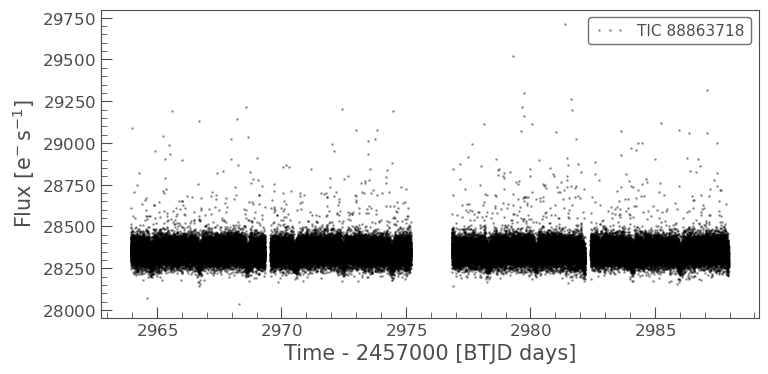

In [22]:
TIC = "TIC 88863718"

search_result = lk.search_targetpixelfile(TIC, author="SPOC", sector = 61)[0]
tpf = search_result.download()

sector_data = lk.search_lightcurve(TIC, author = "SPOC", sector = 61)[0]

lc = sector_data.download()
lc.plot(linewidth = 0, marker = ".", color = "black", alpha = 0.3)
plt.show()

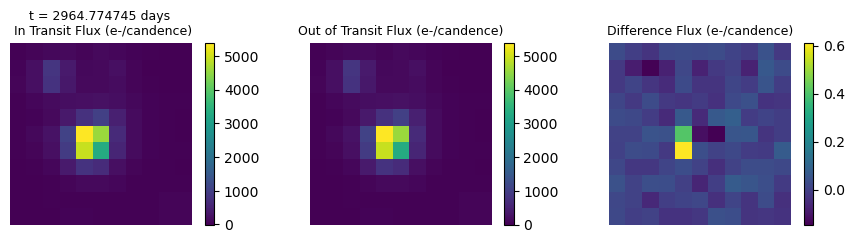

In [23]:
T0 = 2964.774745

plot_in_out_TPF(tpf, T0)